## <center> Medical Insurance Cost Prediction </center>

<b>Problem statement: </b> In this project we are going to predict what is the medical insurance cost of a person. This is a regression problem as the target ouput is continous or numeric. Please note that, in real life, different health insurance providers may have different features or data from the one utilized for this project.


An Otsogile Ogaisitse Onalepelo aka Morena Project.

In [1]:
#Import the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection & Analysis

Dataset can be found online here: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [2]:
# load the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Features

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So, our dataset has no null values for our columns. However, it appers sex, smoker and region have an object datatype. Let us look into each of them to see what they contain.

In [6]:
insurance_dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
insurance_dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
insurance_dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

So they are all categorical features. 

In [9]:
# checking for missing values. 
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Niiiiiice. We do not have any missing values😀. This was just a precautionary step since we already knew from the previous step that we do not have any missing values when we used the info() method.

### Data Analysis

In [10]:
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


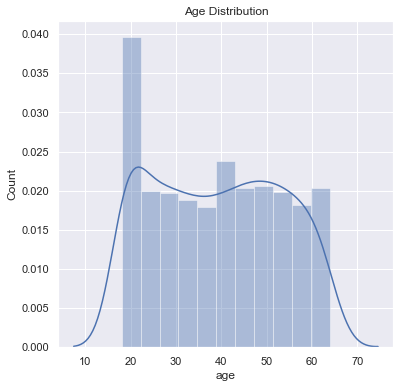

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.ylabel('Count')
plt.show()

So, age values range from 18 to 64, which is pretty normal for people to have such an age distribution. Therefore, it is safe to assume that there are no outliers for this feature.

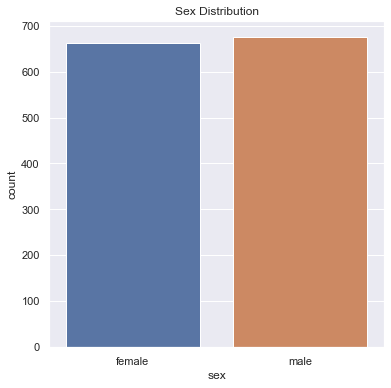

In [12]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
#lets see how our gender values are distributed
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

We have 662 females and 676 females.

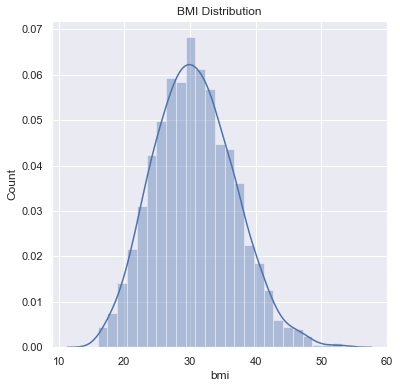

In [14]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.ylabel('Count')
plt.show()

We have a perfet guassian distribution for BMI. If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

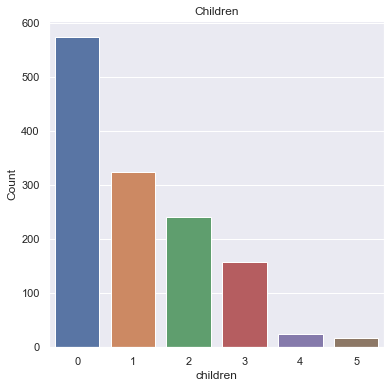

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.ylabel('Count')
plt.show()

Let us look at the children feature distribution with a kernel density estimation

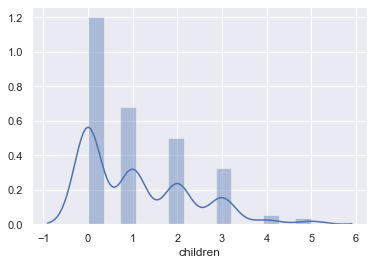

In [16]:
sns.distplot(insurance_dataset['children'])

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

A lot of policy holders in this dataset do not have dependents. This is derived from 574 value above followed by policy holders with 1 dependent.

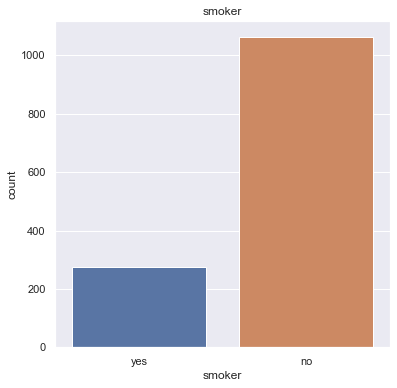

In [18]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have a lot of non smokers in this dataset.

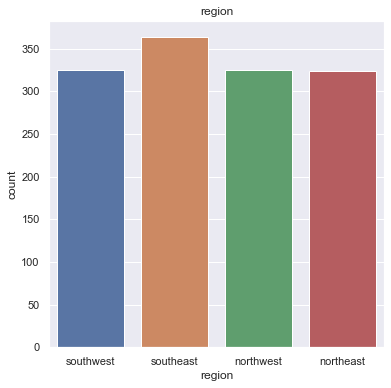

In [20]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [21]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

The region distribution is almost uniform with Southeast having many policy holders than the rest and northeast with the lowest count. But all in all the differences are subtle.

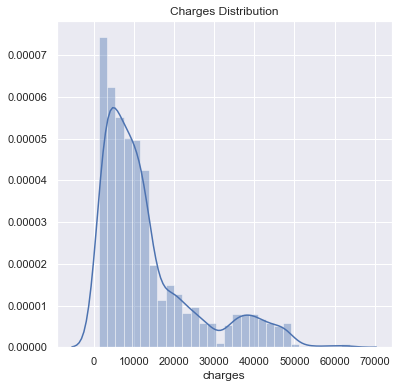

In [22]:
# Distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

The charges distribution kind of has a right skew.

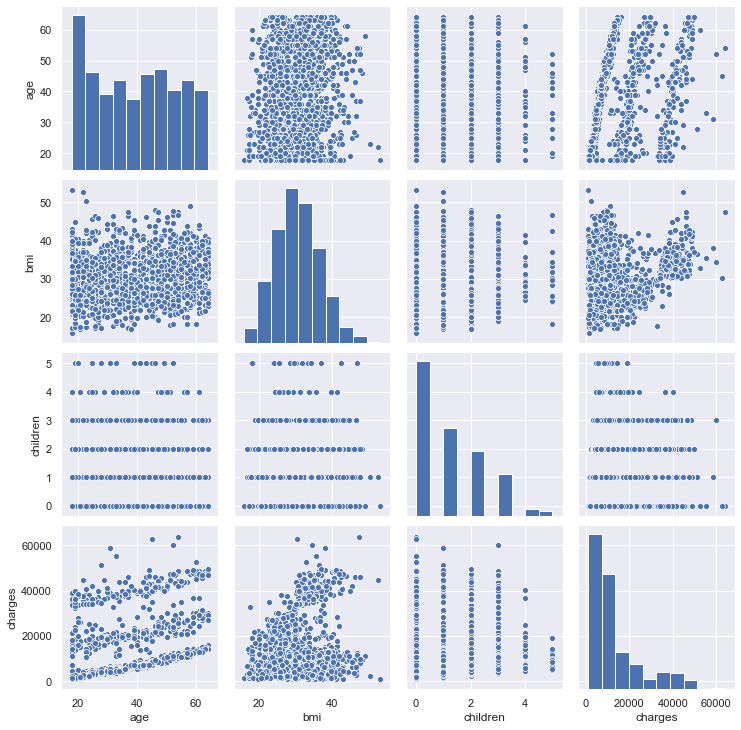

In [23]:
#lets visualize the relationships between our features using a pair plot
sns.pairplot(insurance_dataset)

Hmmmmm...🤔. From the above pairplot, its not easy to decipher any sort of distint relationship or association betwwen our features. We will revisit this later when we conduct feature analysis and selection using the Pearson Correlation Cofficient (PCC).

### Outlier Detection & Removal

From the previous data analysis, it is quite evident that we do not have outliers by just analyzing the distributions and applying domain/common sense. However, this is data and statistics hence. we are going to go an extra step and conduct this analysis rather than just making assumptions which might not be accurate.


We are not going to include nominal features in this analysis since there is no concept of outliers detection in categorical variables(nominal). Each value is counted as a label. 

Another thing, we do not have a lot of features in our dataset which means we are going to utilize traditional statistical ourlier detection and removal method(s) not automatic outlier detection removal techniques. A box whisker plot which uses percentiles under the hood will be utilized for this analysis.

Text(0.5, 0, 'Age')

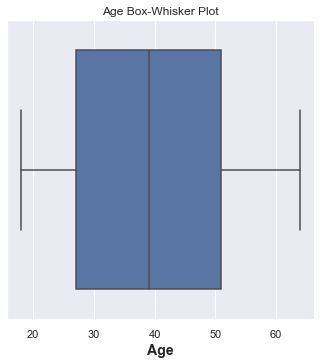

In [24]:
#Age feature outlier detection
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'age', data = insurance_dataset)
plt.title("Age Box-Whisker Plot")
plt.xlabel('Age', fontsize=14, fontweight='bold')

No outliers for the age feature

Text(0.5, 0, 'BMI')

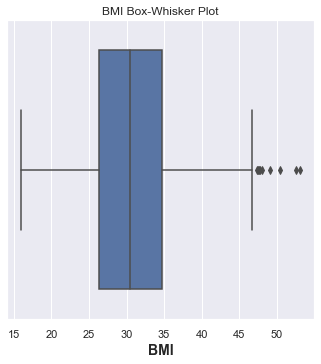

In [25]:
#BMI feature outlier detection
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bmi', data = insurance_dataset)
plt.title("BMI Box-Whisker Plot")
plt.xlabel('BMI', fontsize=14, fontweight='bold')

Well, look at that 😳😳😳. We do have outliers in our data. Some observations in this dataset have very high BMI values. As an afterthought though, the gausian distribution we have for BMI actcually shows that there are some values on the far right of the tail of the curve. Probably around 3-4 standard deviations away from the mean. Therefore, we are going to drop all values which are beyond -3 and +3 standard deviations. The max value for this feature is 53.1, which is quite extreme and indicates morbidly obese individuals. Even though this could be a valid data point as there are people with morbid obesity, it might affect our model performance hence the need to drop them.


Another afterthought. If morbid obesity is considered as a pre existing condidtion, it might actually have an impact on the cost of medical insurance, which is what we are trying to predict here. So, lets not drop these extreme values. Below, let us plot a joint plot with a regression line between charges and and bmi to see if there is any correlation between them.

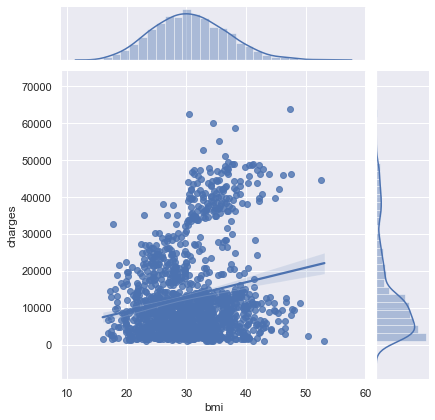

In [26]:
#charges and bmi joint plot with
sns.jointplot(x='bmi',y='charges',data=insurance_dataset, kind='reg')

The joint plot does not tell us much. We have observations within the normal bmi range having medium to high costs. Nonetheles, we will not be droping the outliers we detected above.

Text(0.5, 0, 'Children')

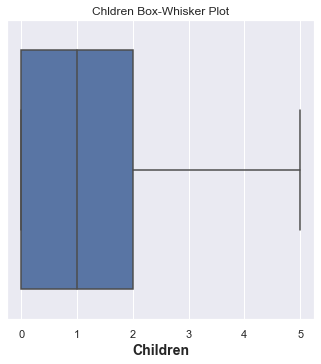

In [27]:
#Children feature outlier detection
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'children', data = insurance_dataset)
plt.title("Chldren Box-Whisker Plot")
plt.xlabel('Children', fontsize=14, fontweight='bold')

No ourliers for the children feature or column.

### Feature Analysis and Selection Using Correlation

Let us now look at the importance and relationships of all the features and select those which are the best for our model.

In [28]:
X_corr = insurance_dataset.drop(["charges","sex","smoker","region"],axis=1)   #Feature Matrix
y_corr = insurance_dataset["charges"] 

In [29]:
len(y_corr)

1338

In [30]:
X_corr

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


From the above we are droping sex, smoker,region as they are categorical features. They cannot be used for our correletion analysis since categorical variables by definition cannot yield a mean. 

In [31]:
# separate dataset into train and test for correlation analysis
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_corr,
    y_corr,
    test_size=0.2,
    random_state=0)

X_train_c.shape, X_test_c.shape

((1070, 3), (268, 3))

In [32]:
X_train_c.corr()

,age,bmi,children
age,1.000000,0.112190,0.056075
bmi,0.112190,1.000000,0.020194
children,0.056075,0.020194,1.000000


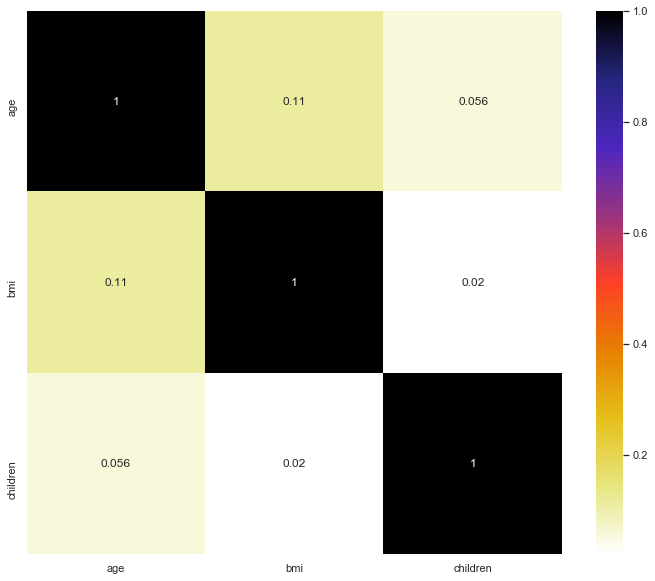

In [33]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))

#find out the correlation with the corr() method
cor = X_train_c.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

PCC for almost all our features is 0.1 which is basically 0. This means our features have no correlation. Due to this, we are going to have to use all of them for model building. Given that we also do not have a curse of dimensionality in our datasaet it is also logical that we use all our features. They are very few. But before we do that. Let us run a function to fetch any correalated features from our dataset.

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold): #we will specify the corr threshold when calling the function
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
#here we used 70% as the correlation value but most times 80% is used
#this also considers negative correlation not just positive. 
corr_features = correlation(X_train_c, 0.7)
len(set(corr_features))

0

In [36]:
#print out all the correlated features
corr_features

set()

As mentiontioned above, the function we wrote to get all correlated features is also returning an empty set. Thus, lets proceed to model building but before then, some final preprocessing 🏃‍♂️🏃‍♀️. We have to encode our categorical features.  

## Data Pre-Processing

### Encode the categorical features using Label Encoder

Machine learning works with numerical data. So let us convert all the categorical features to a numeric form.

In [37]:
from sklearn.preprocessing import LabelEncoder
#create the label encoder class object
le = LabelEncoder()
insurance_dataset.sex = le.fit_transform(insurance_dataset.sex)
insurance_dataset.smoker = le.fit_transform(insurance_dataset.smoker)
insurance_dataset.region = le.fit_transform(insurance_dataset.region)

Alright, so our categorical features are now enconded. Note that we could have used pandas get dummies to accomplish the same thing we did with label encoder. It is also worth noting that label enconding has one down side. The model might assume that there is some order in our categorical features or relationship while infact there is none due to how the features are encoded. To circumvent this pitfall, we could use one hot enconding or get dummies and drop one of the dummy variables to avoid the dummy variable trap. Sklearn already takes care of the dummy variable trap for us but its good practice and habit to do it manually.

In [38]:
insurance_dataset.sex.unique()

array([0, 1])

In [39]:
insurance_dataset.smoker.unique()

array([1, 0])

In [40]:
insurance_dataset.region.unique()

array([3, 2, 1, 0])

In [41]:
# separate dataset into train and test for model building
X = insurance_dataset.drop("charges",axis=1)
y = insurance_dataset["charges"] 

In [42]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [43]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((936, 6), (402, 6))

### Model Building: Linear Regression


In [45]:
# loading the Linear Regression model
regressor = LinearRegression()

In [46]:
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation using R-Squared

Rsquared explains how well the regression model fits the observed data

In [47]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [48]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.7306840408360218


In [49]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [50]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7911113876316933


In [51]:
regressor.score(X_test,y_test)

0.7911113876316933

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [52]:
from sklearn.model_selection import ShuffleSplit #it randomizes  our samples to ensure each fold has equal distribution
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79987471, 0.74792712, 0.71092717, 0.77433601, 0.80803446])

In [53]:
#get the mean score for all the predictions the model made
cross_val_score(LinearRegression(), X, y, cv=cv).mean()

0.7682198943012135

All in all. Our model performance is not very bad.

## Find best model using GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.768220,{'normalize': True}
1,lasso,0.768218,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.732166,"{'criterion': 'mse', 'splitter': 'random'}"


Lasso and Linear regression are tied as the best models for this dataset. Since thier difference is not much. We will just leave this part of this project as it is

### Test the model

In [55]:
input_data = (19,0,27.900,0,1,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[24798.33579241]
The insurance cost is USD  24798.335792405494


Model building is complete, lets export it to a pickle file to used by our python FastAPI sever

### Export the tested model to a pickle file

In [56]:
import pickle
with open('medical_cost_prediction_model.pickle','wb') as f:
    pickle.dump(regressor,f)